# Clustering Months

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  
import calendar
from sklearn.cluster import KMeans  
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv("APD_Public_Incident_Data__Crime_Locations.csv")

In [3]:
df['dt'] = pd.to_datetime(df['date_occurred'])

In [4]:
in_df = pd.DataFrame(df[['dt','offense_group_short_description']])

In [5]:
in_df.columns = ['dt', 'offense']

In [6]:
def get_month(dt):
    # return dt.strftime("%B")
    return int(dt.strftime("%-m"))

In [7]:
in_df['month'] = in_df['dt'].apply(get_month)

In [8]:
in_df.drop(['dt'], axis=1, inplace=True)

In [9]:
in_df['count'] = 1

In [10]:
in_df.head()

,offense,month,count
0,VANDALISM,2,1
1,ROBBERY,5,1
2,SIMPLE ASSAULT,6,1
3,NON-REPORTABLE,2,1
4,SIMPLE ASSAULT,2,1


In [11]:
gb = in_df.groupby(['month', 'offense']).agg('count')

In [12]:
gb = gb.reset_index()

In [13]:
gb.head(10)

,month,offense,count
0,1,ADDITIONAL OFFENSE CATEGORIES,276
1,1,AGGRAVATED ASSAULT,139
2,1,ALL OTHER OFFENSES,200
3,1,ARSON,12
4,1,BURGLARY,811
5,1,CRIMINAL HOMICIDE,10
6,1,DISORDERLY CONDUCT,57
7,1,DRUG/NARCOTIC OFFENSES,354
8,1,EMBEZZLEMENT,95
9,1,FORGERY AND COUNTERFEITING,157


In [14]:
piv = gb.pivot(index='month', columns='offense', values='count')

In [15]:
piv = piv.fillna(0)
piv.sort_index(inplace=True)

In [16]:
piv

offense,ADDITIONAL OFFENSE CATEGORIES,AGGRAVATED ASSAULT,ALL OTHER OFFENSES,ARSON,BURGLARY,CRIMINAL HOMICIDE,DISORDERLY CONDUCT,DRIVING WHILE IMPAIRED,DRUG/NARCOTIC OFFENSES,EMBEZZLEMENT,...,NON-REPORTABLE,OBSCENE MATERIAL / PORNOGRAPHY,OFFENSES AGAINST FAMILY,PROSTITUTION OFFENSES,ROBBERY,SEX OFFENSES,SIMPLE ASSAULT,STOLEN PROPERTY,VANDALISM,WEAPON LAW VIOLATIONS
month,,,,,,,,,,,,,,,,,,,,,
1,276.0,139.0,200.0,12.0,811.0,10.0,57.0,0.0,354.0,95.0,...,1165.0,8.0,3.0,1.0,218.0,11.0,903.0,22.0,436.0,43.0
2,270.0,98.0,193.0,6.0,697.0,4.0,55.0,0.0,385.0,57.0,...,1060.0,4.0,2.0,1.0,147.0,11.0,866.0,22.0,376.0,50.0
3,287.0,131.0,206.0,7.0,744.0,4.0,70.0,0.0,406.0,71.0,...,1203.0,6.0,6.0,1.0,145.0,15.0,932.0,27.0,466.0,56.0
4,303.0,132.0,219.0,8.0,852.0,5.0,81.0,8.0,406.0,72.0,...,1228.0,2.0,4.0,1.0,203.0,6.0,929.0,14.0,489.0,61.0
5,297.0,146.0,229.0,9.0,826.0,4.0,65.0,3.0,415.0,78.0,...,1265.0,5.0,2.0,0.0,202.0,19.0,944.0,26.0,459.0,51.0
6,247.0,140.0,182.0,5.0,827.0,5.0,61.0,0.0,351.0,62.0,...,1194.0,5.0,4.0,1.0,177.0,15.0,985.0,24.0,469.0,41.0
7,294.0,153.0,224.0,20.0,960.0,6.0,70.0,0.0,365.0,85.0,...,1301.0,3.0,10.0,0.0,215.0,10.0,1054.0,33.0,457.0,44.0
8,308.0,110.0,212.0,17.0,924.0,6.0,67.0,0.0,348.0,84.0,...,1164.0,6.0,3.0,2.0,236.0,13.0,1016.0,26.0,475.0,42.0
9,279.0,129.0,161.0,25.0,938.0,6.0,68.0,0.0,372.0,78.0,...,1230.0,5.0,3.0,2.0,221.0,21.0,937.0,30.0,371.0,49.0


In [17]:
piv.columns

Index(['ADDITIONAL OFFENSE CATEGORIES', 'AGGRAVATED ASSAULT',
       'ALL OTHER OFFENSES', 'ARSON', 'BURGLARY', 'CRIMINAL HOMICIDE',
       'DISORDERLY CONDUCT', 'DRIVING WHILE IMPAIRED',
       'DRUG/NARCOTIC OFFENSES', 'EMBEZZLEMENT', 'FORGERY AND COUNTERFEITING',
       'FRAUD', 'GAMBLING OFFENSES', 'LARCENY - THEFT',
       'LIQUOR LAW VIOLATIONS', 'MOTOR VEHICLE THEFT', 'NON-REPORTABLE',
       'OBSCENE MATERIAL / PORNOGRAPHY', 'OFFENSES AGAINST FAMILY',
       'PROSTITUTION OFFENSES', 'ROBBERY', 'SEX OFFENSES', 'SIMPLE ASSAULT',
       'STOLEN PROPERTY', 'VANDALISM', 'WEAPON LAW VIOLATIONS'],
      dtype='object', name='offense')

In [18]:
len(piv.columns)

26

In [45]:
X = piv[['BURGLARY', 'LARCENY - THEFT']].values

In [46]:
type(X)

numpy.ndarray

In [50]:
X

array([[ 811., 2184.],
       [ 697., 1909.],
       [ 744., 2028.],
       [ 852., 2356.],
       [ 826., 2450.],
       [ 827., 2581.],
       [ 960., 2741.],
       [ 924., 2652.],
       [ 938., 2512.],
       [ 765., 2063.],
       [ 873., 2203.],
       [ 822., 1978.]])

In [47]:
#X=np.matrix(zip(f10, f11))

In [52]:
def cluster_and_plot(X):
    Z = linkage(X, 'ward')
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(
        Z,
        #leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=20.,  # font size for the x axis labels
    )
    plt.show()

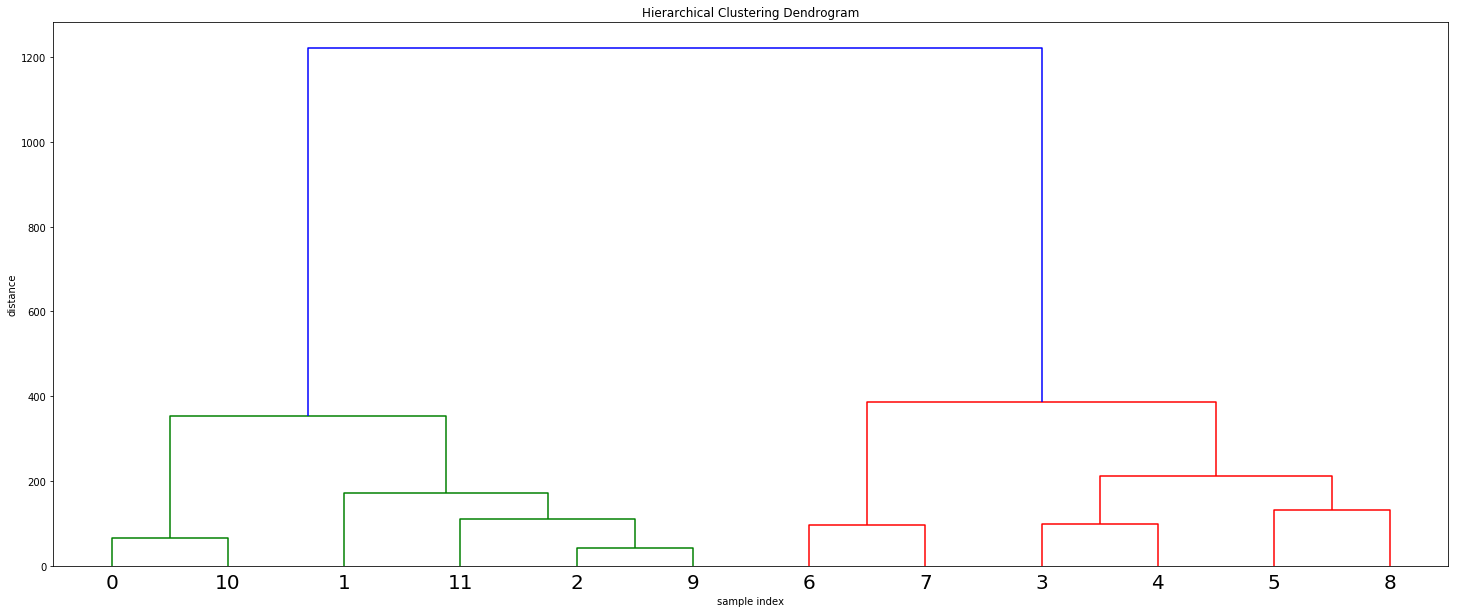

In [53]:
cluster_and_plot(X)

_remember to add "one" to get the proper month - for example 0 is January, 6 is July_

First cluster is winter, second cluster is summer. January and November are most similar. July and August are also similar.

In [54]:
X = piv[['AGGRAVATED ASSAULT', 'CRIMINAL HOMICIDE',
       'DISORDERLY CONDUCT', 'DRIVING WHILE IMPAIRED',
       'DRUG/NARCOTIC OFFENSES',]].values

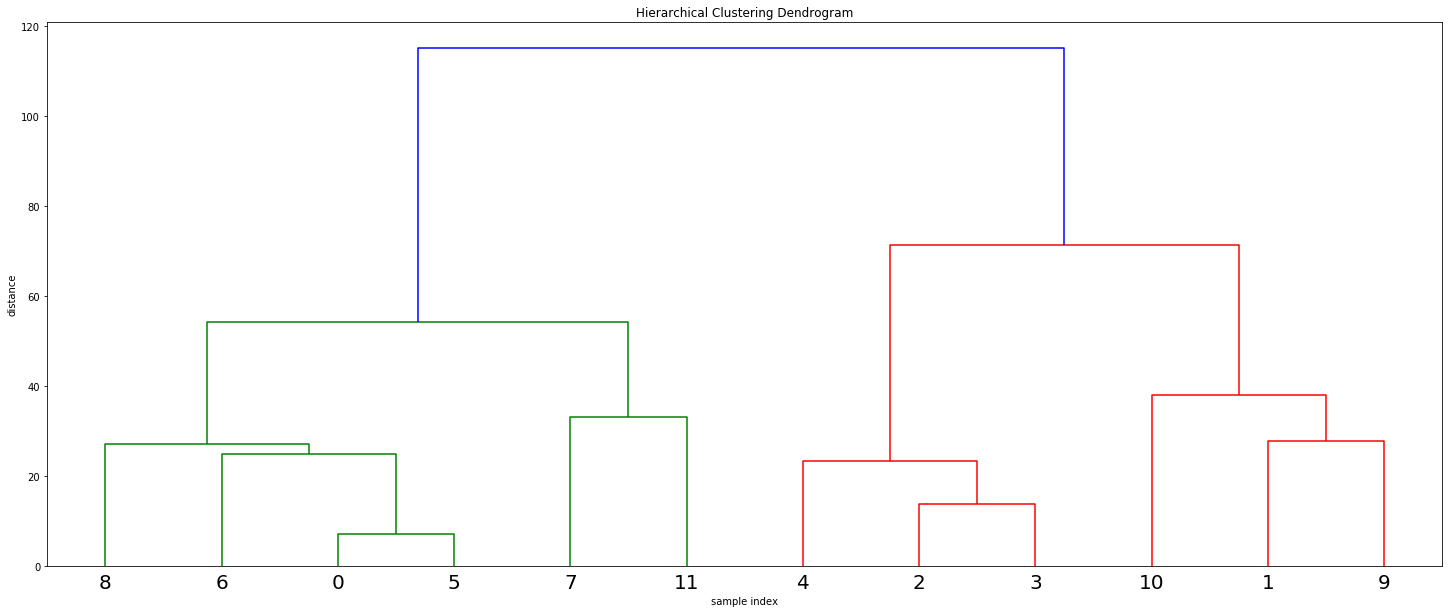

In [55]:
cluster_and_plot(X)

again we see a summer and winter cluster 

but the summer cluster includes January 